In [1]:
using PyPlot
using LsqFit

In [2]:
data_4w = readcsv("resonance-2015_10_21.csv", Float64, skipstart=1);

In [3]:
freqs = data_4w[:, 1] * 2
ratio = data_4w[:, 3] ./ data_4w[:, 2] / 10
ratio_err = ratio .* 0.05;

In [4]:
model_eom(f, p) = p[1] ./ (1 .+ (2 .* (f .- p[2]) ./ p[3]).^2)

model_eom (generic function with 1 method)

In [5]:
eom_fit = curve_fit(model_eom, freqs, ratio, ratio_err, [200.0, 1724.0, 3.0])
sigma_fit = estimate_errors(eom_fit, 0.7)
eom_fit.param, sigma_fit

([218.59015659624956,1723.299941485799,3.5308620557208257],[0.5379199888953689,0.004451184804855671,0.009896817532342762])

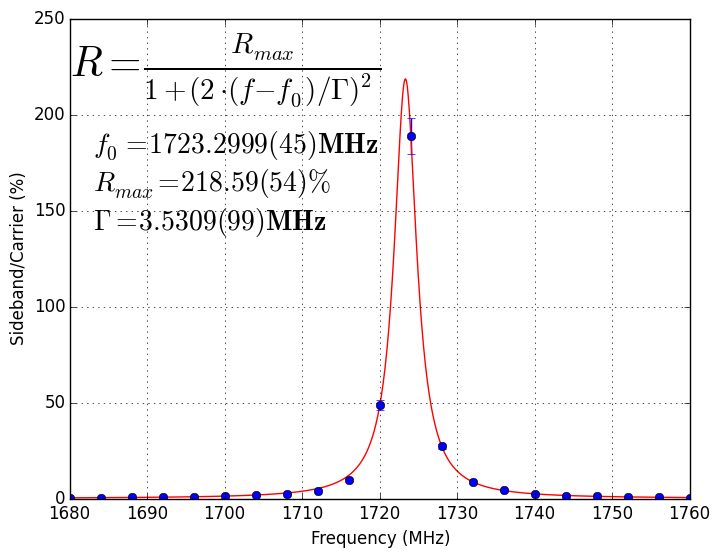

In [6]:
freqs_fit = linspace(1680, 1760, 1000)
ratio_fit = model_eom(freqs_fit, eom_fit.param)
plot(freqs_fit, ratio_fit, "r")

errorbar(freqs, ratio, ratio_err, fmt="bo")
ylabel("Sideband/Carrier (%)")
xlabel("Frequency (MHz)")
grid()

text(1680, 220, "\$R=\\frac{R_{max}}{1+\\left(2\\cdot(f-f_0)/\\Gamma\\right)^2}\$"; size=30)
text(1683, 180, @sprintf("\$f_0 = %.4f(%d)\\mathbf{MHz}\$", eom_fit.param[2], sigma_fit[2] * 1e4); size=20)
text(1683, 160, @sprintf("\$R_{max} = %.2f(%d)\\mathbf{\\%%}\$", eom_fit.param[1], sigma_fit[1] * 1e2); size=20)
text(1683, 140, @sprintf("\$\\Gamma = %.4f(%d)\\mathbf{MHz}\$", eom_fit.param[3], sigma_fit[3] * 1e4); size=20)

savefig("resonance-2015_10_21.png")